In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 

In [2]:
DEMO = pd.read_csv('LPOINT_BIG_COMP_01_DEMO.csv',encoding='cp949') # 고객정보
PDDE = pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv', parse_dates = [6],encoding='cp949') # 구매정보
CLAC = pd.read_csv('LPOINT_BIG_COMP_04_PD_CLAC.csv',encoding='cp949') # 상품 정보

C:\Users\darle\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
DF = pd.merge(PDDE, DEMO, on='cust')
DF = pd.merge(DF, CLAC, on='pd_c')
DF = DF.loc[(DF['ages'] == '20대')&(DF['cop_c'].apply(lambda x: x in ['A02', 'A03', 'A04']))]
print(DF.shape)
DF.head()

(196262, 16)


,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
654,M496844384,A02191496496,1,A02,A020053,PD0290,2021-05-08,17,39000.0,1,여성,20대,Z17,남성티셔츠,남성의류,남성의류상의
2574,M748140584,A02262444001,1,A02,A020080,PD0290,2021-01-08,17,20000.0,2,남성,20대,Z11,남성티셔츠,남성의류,남성의류상의
2575,M748140584,A02262444001,1,A02,A020080,PD0290,2021-01-08,17,9000.0,9,남성,20대,Z11,남성티셔츠,남성의류,남성의류상의
2576,M748140584,A02262444001,1,A02,A020080,PD0290,2021-01-08,17,900.0,9,남성,20대,Z11,남성티셔츠,남성의류,남성의류상의
3166,M395590139,A02064243742,1,A02,A020012,PD0290,2021-02-01,11,600.0,6,여성,20대,Z17,남성티셔츠,남성의류,남성의류상의


In [4]:
factor3 = ['샐러드','떠먹는요구르트']

fa3df = DF.loc[DF['pd_nm'].apply(lambda x: x in factor3)]
fa3df.tail()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
3275883,M317515254,A04100924019,1,A04,A041592,PD1246,2021-10-16,23,2200.0,1,남성,20대,Z01,샐러드,조리식품,냉장조리
3275884,M317515254,A04100924019,1,A04,A041592,PD1246,2021-10-16,23,2200.0,1,남성,20대,Z01,샐러드,조리식품,냉장조리
3275893,M925008386,A04126443424,1,A04,A042214,PD1246,2021-12-23,15,2200.0,1,남성,20대,Z15,샐러드,조리식품,냉장조리
3275895,M779312191,A04008404134,1,A04,A040507,PD1246,2021-02-04,17,2200.0,1,여성,20대,Z13,샐러드,조리식품,냉장조리
3275909,M470886431,A04062878881,1,A04,A045234,PD1246,2021-07-15,16,3500.0,1,여성,20대,Z14,샐러드,조리식품,냉장조리


In [5]:
times_3 = fa3df.groupby(["de_hr","pd_nm"])['cust'].count()
times_3_df = pd.DataFrame(times_3, columns=['cust'])

times_3_df.reset_index(inplace=True)
times_3_df.head()

,de_hr,pd_nm,cust
0,0,떠먹는요구르트,5
1,1,떠먹는요구르트,6
2,1,샐러드,1
3,2,떠먹는요구르트,2
4,3,떠먹는요구르트,3


In [6]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [7]:
times_3_df["pd_nm"].dropna()
times_3_df["pd_nm"].unique()

array(['떠먹는요구르트', '샐러드'], dtype=object)

<AxesSubplot:title={'center':'떠먹는 요구르트와 샐러드 시간별 구매고객 수'}, xlabel='시간대', ylabel='구매 고객 수'>

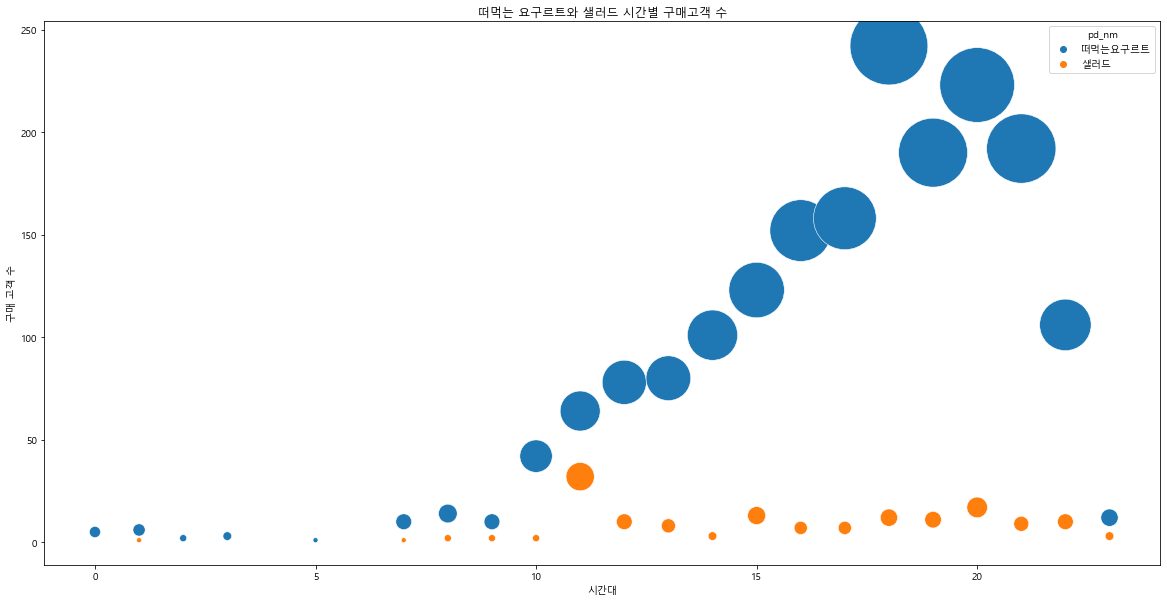

In [8]:
plt.figure(figsize=(20, 10))
plt.title('떠먹는 요구르트와 샐러드 시간별 구매고객 수')
plt.xlabel('시간대')
plt.ylabel('구매 고객 수')
sns.scatterplot(x=times_3_df['de_hr'],y=times_3_df['cust'],hue=times_3_df["pd_nm"],s=times_3_df['cust']*25)

# 요구르트와 죽

In [9]:
factor4 = ['즉석죽','떠먹는요구르트']

fa4df = DF.loc[DF['pd_nm'].apply(lambda x: x in factor4)]
fa4df.tail()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
3356552,M945421374,A04033771203,1,A04,A043120,PD0397,2021-05-03,8,3900.0,1,남성,20대,Z10,즉석죽,대용식,레토르트
3356585,M719000923,A04087596141,1,A04,A041032,PD0397,2021-09-14,14,3900.0,1,여성,20대,Z08,즉석죽,대용식,레토르트
3356586,M719000923,A04087596141,1,A04,A041032,PD0397,2021-09-14,14,3900.0,1,여성,20대,Z08,즉석죽,대용식,레토르트
3356587,M719000923,A04088860751,1,A04,A041032,PD0397,2021-09-17,15,3900.0,1,여성,20대,Z08,즉석죽,대용식,레토르트
3356588,M719000923,A04088860751,1,A04,A041032,PD0397,2021-09-17,15,3900.0,1,여성,20대,Z08,즉석죽,대용식,레토르트


In [10]:
times_4 = fa4df.groupby(["de_hr","pd_nm"])['cust'].count()
times_4_df = pd.DataFrame(times_4, columns=['cust'])

times_4_df.reset_index(inplace=True)
times_4_df.head()

,de_hr,pd_nm,cust
0,0,떠먹는요구르트,5
1,0,즉석죽,2
2,1,떠먹는요구르트,6
3,1,즉석죽,2
4,2,떠먹는요구르트,2


In [11]:
times_4_df["pd_nm"].dropna()
times_4_df["pd_nm"].unique()

array(['떠먹는요구르트', '즉석죽'], dtype=object)

<AxesSubplot:title={'center':'떠먹는 요구르트와 즉석죽 시간별 구매고객 수'}, xlabel='시간대', ylabel='구매 고객 수'>

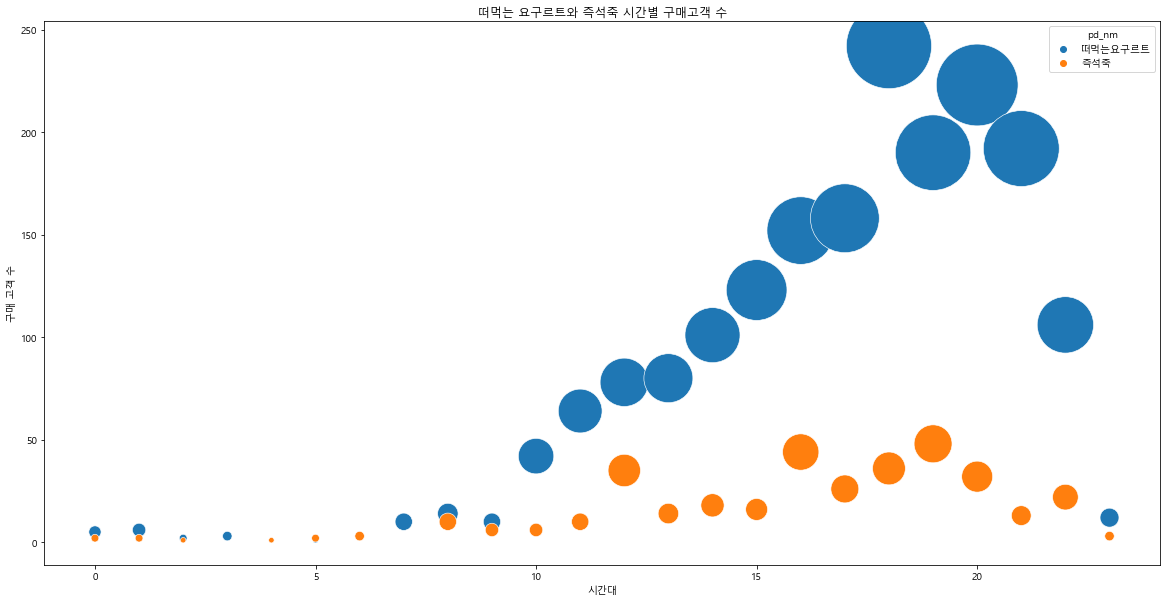

In [12]:
plt.figure(figsize=(20, 10))
plt.title('떠먹는 요구르트와 즉석죽 시간별 구매고객 수')
plt.xlabel('시간대')
plt.ylabel('구매 고객 수')
sns.scatterplot(x=times_4_df['de_hr'],y=times_4_df['cust'],hue=times_4_df["pd_nm"],s=times_4_df['cust']*30)

# 떠먹는 요구르트와 죽을 한번에 구매한 경우

In [13]:
#영주증 번호로 groupby하기, pd_nm은 모두 연결한다.
new_group = fa4df.groupby('rct_no')['pd_nm'].apply(lambda x: x.sum())
new_group.tail()

rct_no
E02005314971    즉석죽즉석죽
E02012543074       즉석죽
E02025755357    즉석죽즉석죽
E02026783937       즉석죽
E02027770055       즉석죽
Name: pd_nm, dtype: object

In [14]:
#시리즈를 데이터프레임으로 바꿔준다.
new_df = pd.DataFrame(new_group)

new_df.reset_index(inplace=True)
new_df.tail(10)

,rct_no,pd_nm
1802,E02000238036,즉석죽
1803,E02001594550,즉석죽즉석죽즉석죽즉석죽즉석죽즉석죽즉석죽
1804,E02002202113,즉석죽
1805,E02002248201,즉석죽
1806,E02005302323,즉석죽
1807,E02005314971,즉석죽즉석죽
1808,E02012543074,즉석죽
1809,E02025755357,즉석죽즉석죽
1810,E02026783937,즉석죽
1811,E02027770055,즉석죽


In [15]:
#죽과 떠먹는 요구르트를 모두 구매한 행(영수증)만 추출한다.
new_menu = new_df[new_df['pd_nm'].str.contains('죽')]
new_menu = new_menu[new_menu['pd_nm'].str.contains('요구르트')]
new_menu.head(100)

,rct_no,pd_nm
160,A02069003119,떠먹는요구르트즉석죽
392,A02140917940,떠먹는요구르트즉석죽즉석죽
863,A02268313284,떠먹는요구르트즉석죽즉석죽
1072,A02334131908,떠먹는요구르트즉석죽
1113,A02344700121,떠먹는요구르트즉석죽
1290,A03075885590,떠먹는요구르트즉석죽즉석죽
1319,A03088469093,떠먹는요구르트즉석죽
1341,A03091200613,떠먹는요구르트떠먹는요구르트즉석죽즉석죽
1419,A03141621517,떠먹는요구르트즉석죽
1438,A03145220201,떠먹는요구르트즉석죽


In [16]:
#고객 데이터를 영수증, 시간, 고객번호를 기준으로 그룹화한다.
mem = PDDE.groupby(['rct_no','de_hr','cust'])['buy_ct'].sum()
mem2=mem.reset_index()
mem2.head()

,rct_no,de_hr,cust,buy_ct
0,A01000001113,10,M430112881,1
1,A01000002265,10,M646853852,1
2,A01000003148,10,M430112881,2
3,A01000004946,10,M430112881,1
4,A01000005297,10,M430112881,1


In [17]:
#죽과 떠먹는 요구르트를 모두 구매한 행(영수증)과 고객 데이터를 합친다.
new_menu_cust = pd.merge(new_menu, mem2, on='rct_no')

new_menu_cust.head()

,rct_no,pd_nm,de_hr,cust,buy_ct
0,A02069003119,떠먹는요구르트즉석죽,12,M474461629,3
1,A02140917940,떠먹는요구르트즉석죽즉석죽,22,M774918695,6
2,A02268313284,떠먹는요구르트즉석죽즉석죽,19,M792914672,8
3,A02334131908,떠먹는요구르트즉석죽,15,M835307234,19
4,A02344700121,떠먹는요구르트즉석죽,20,M836955156,21


In [18]:
#시간대를 기준으로 해당 시간에 죽과 떠먹는 요구르트로 구매한 사람이 몇명인지 파악한다.
new_time = new_menu_cust.groupby(['de_hr'])['rct_no'].count()

new_time=new_time.reset_index()
new_time.head(20)

,de_hr,rct_no
0,10,1
1,11,1
2,12,1
3,13,1
4,15,1
5,16,2
6,17,1
7,18,1
8,19,2
9,20,1


Text(0, 0.5, '구매 고객 수')

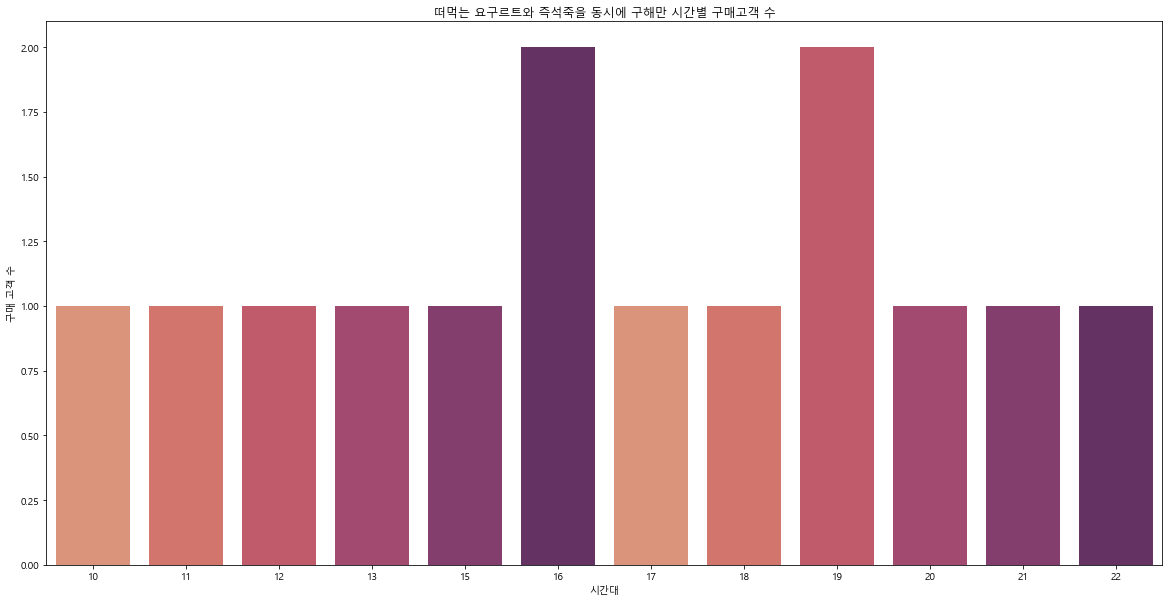

In [19]:
#막대그래프
plt.figure(figsize=(20, 10))
plt.title('떠먹는 요구르트와 즉석죽을 동시에 구해만 시간별 구매고객 수')

p1=sns.color_palette("flare")
sns.barplot(x=new_time['de_hr'],y=new_time['rct_no'],palette=p1)

plt.xlabel('시간대')
plt.ylabel('구매 고객 수')

### 고객번호로 groupy하여 죽, 떠먹는 요구르트 조합으로 구매한 횟수 파악

In [20]:
new_mem = new_menu_cust.groupby(['cust'])['rct_no'].count()

new_mem =new_mem.reset_index()
new_mem .head(20)

,cust,rct_no
0,M060482501,1
1,M244448149,1
2,M387424012,1
3,M474461629,1
4,M520449110,3
5,M538019109,1
6,M774918695,1
7,M792914672,1
8,M835307234,1
9,M836955156,1
